In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [5]:
plt.style.use('seaborn')
X=pd.read_csv('Logistic_X_Train.csv')
Y=pd.read_csv('Logistic_Y_Train.csv')
X_train=X.values
Y_train=Y.values

print(type(X_train))
print(X_train.shape)
print(Y_train.shape)

<class 'numpy.ndarray'>
(3000, 3)
(3000, 1)


In [6]:
X2=pd.read_csv('Logistic_X_Test.csv')
X_test=X2.values

print(X_test.shape)

(1000, 3)


In [7]:
def hypothesis(x,w,b):
    '''accepts input vector x, input weight vector w and bias b'''
    
    h = np.dot(x,w) + b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

def error(y_true,x,w,b):
    
    m = x.shape[0]
    
    err = 0.0
    
    for i in range(m):
        hx = hypothesis(x[i],w,b) 
        err += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
        
    
    return -err/m


def get_grads(y_true,x,w,b):
    
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        
        grad_w += (y_true[i] - hx)*x[i]
        grad_b +=  (y_true[i]-hx)
        
    
    grad_w /= m
    grad_b /= m
    
    return [grad_w,grad_b]


# One Iteration of Gradient Descent
def grad_descent(x,y_true,w,b,learning_rate=0.1):
    
    err = error(y_true,x,w,b)
    [grad_w,grad_b] = get_grads(y_true,x,w,b)
    
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    
    return err,w,b
    
def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
    
def get_pred_arr(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return y_pred

In [8]:
loss = []
acc = []

W = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

In [9]:
for i in range(1000):
    l,W,b = grad_descent(X_train,Y_train,W,b,learning_rate=0.1)
    #acc.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)

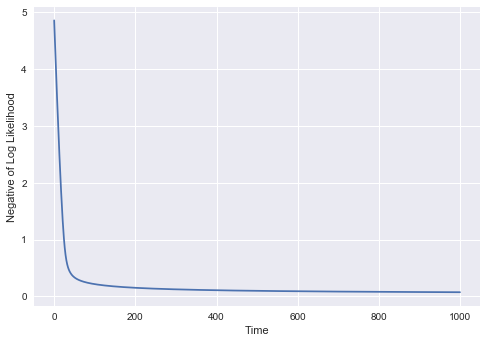

In [10]:
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

In [15]:
predictions=[]

m=X_test.shape[0]
for i in range(m):
    predictions.append(predict(X_test[i],W,b))

    
predictions=np.array(predictions)
print(type(predictions))
print(predictions.shape)

<class 'numpy.ndarray'>
(1000,)


In [17]:
pd.DataFrame(predictions).to_csv("s.csv")

In [18]:
print(predictions[0])

1
